### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']= [15,8]

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm

In [3]:
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

In [4]:
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

### Dataset

In [5]:
original_df = pd.read_csv('wine.csv')
original_df.head(2)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [6]:
df = pd.read_csv('wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.drop('Wine', axis = 1, inplace = True)

In [8]:
df.head(2)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [9]:
df = df.rename(columns={'Malic.acid': 'Malic_acid', 'Nonflavanoid.phenols': 'Nonflavanoid_phenols'})
df.head(2)

,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [10]:
df = df.rename(columns={'Color.int': 'Color_int'})
df.head(2)

,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [11]:
# Lets perform some Exploratory Data Analysis.

### Data Preprocessing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Acl                   178 non-null    float64
 4   Mg                    178 non-null    int64  
 5   Phenols               178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_phenols  178 non-null    float64
 8   Proanth               178 non-null    float64
 9   Color_int             178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD                    178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [13]:
df.shape

(178, 13)

In [14]:
df.isnull().sum().sum()

0

In [15]:
# No null values in the data.

In [16]:
df.dtypes

Alcohol                 float64
Malic_acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid_phenols    float64
Proanth                 float64
Color_int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

In [17]:
# All the variables are numerical encoded.

In [18]:
df.describe()

,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [19]:
df.shape

(178, 13)

### Outlier treatment

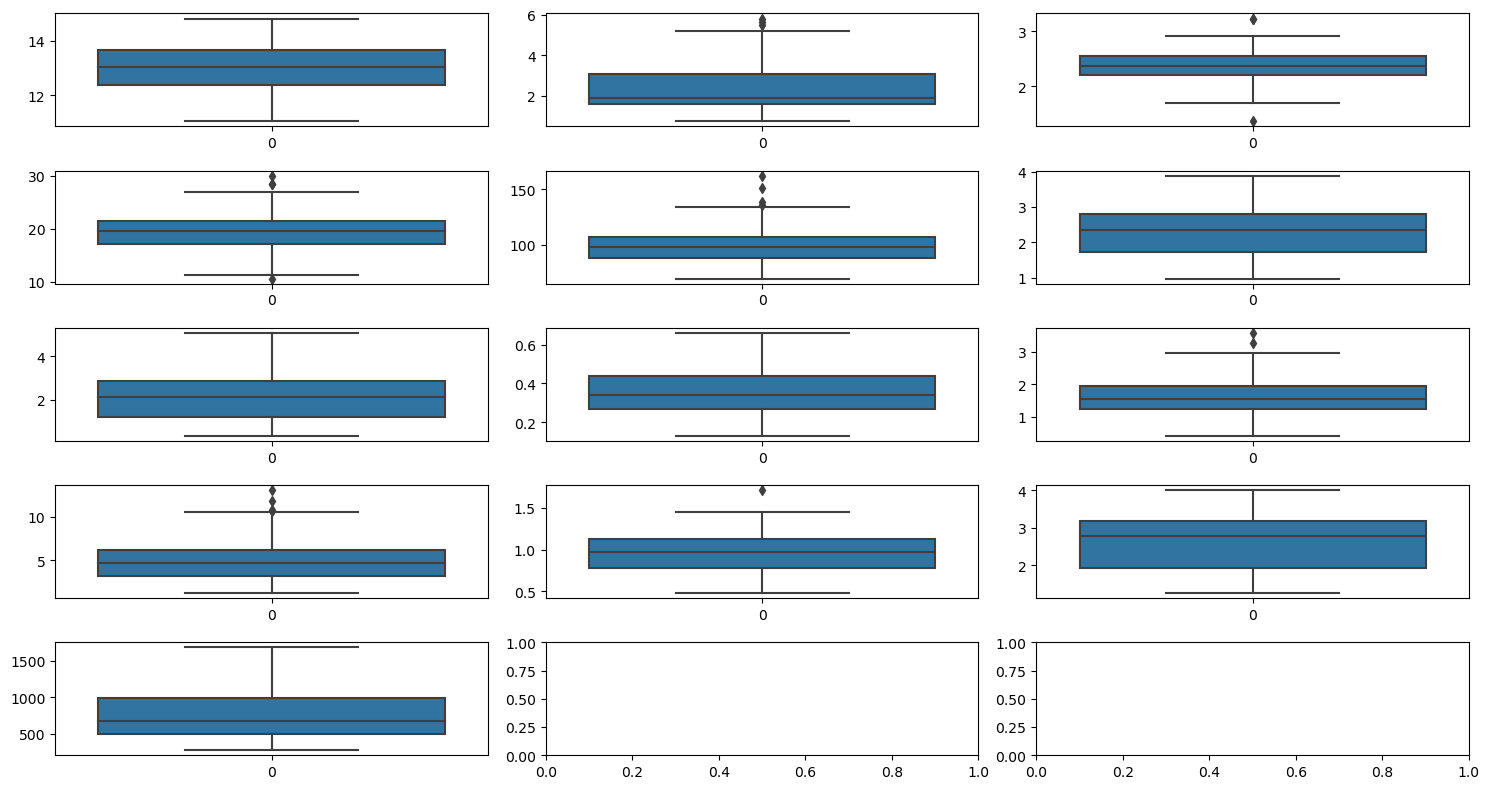

In [20]:
fig, ax = plt.subplots(nrows = 5, ncols = 3)

for variable, subplot in zip(df.columns, ax.flatten()):
    sns.boxplot(df[variable], ax = subplot)
plt.tight_layout()
plt.show()

In [21]:
# There are few outiers in the data.

### Correlation

In [22]:
df.corr()

,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_int,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


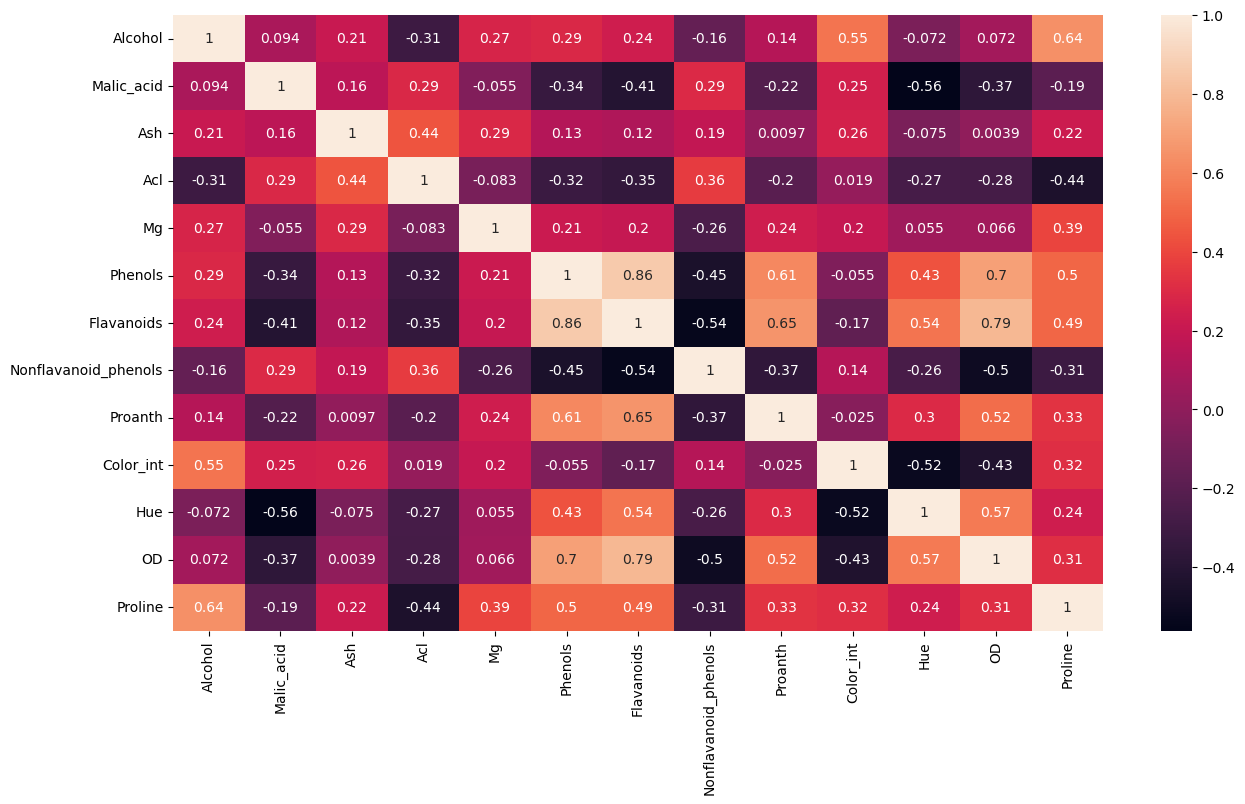

In [23]:
sns.heatmap(df.corr(), annot = True);

### Scaling the data

In [24]:
X_norm = StandardScaler()
num_norm = X_norm.fit_transform(df)
X = pd.DataFrame(num_norm, columns = df.columns)

X.head()

,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


### KMeans Clustering

### Optimal Value of K Using Elbow Plot

In [25]:
wcss  = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

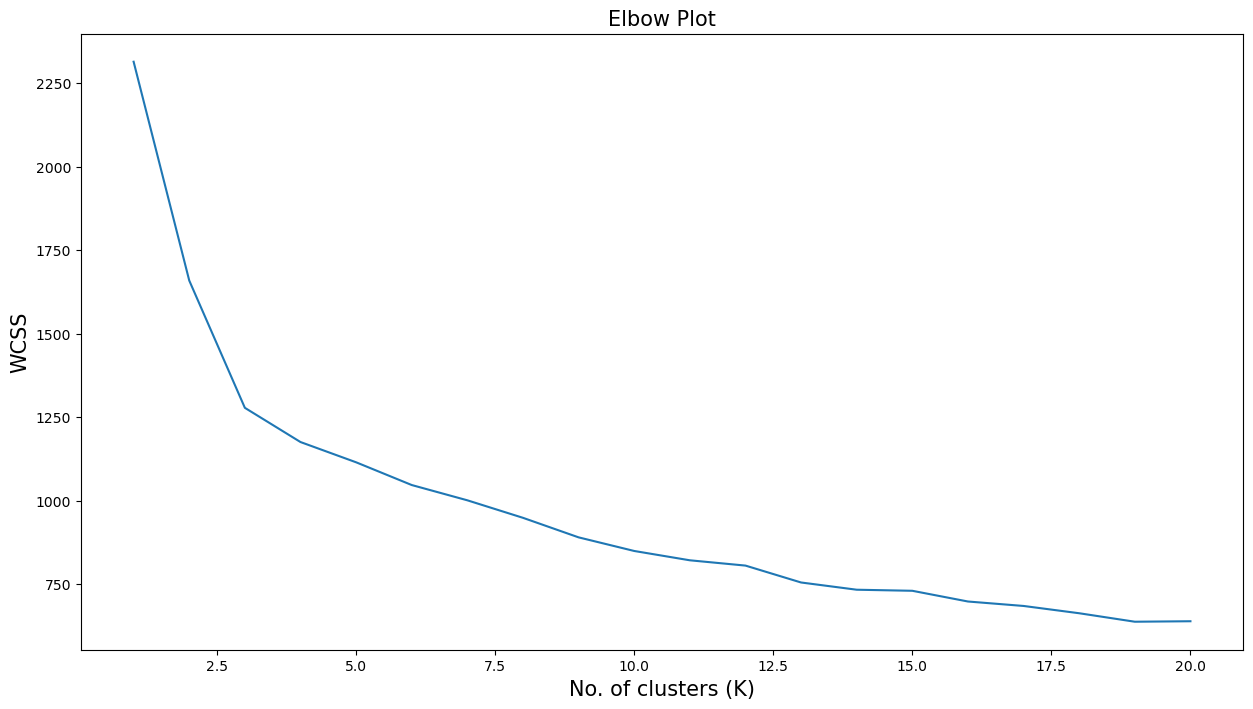

In [26]:
plt.plot(range(1,21), wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

plt.show()

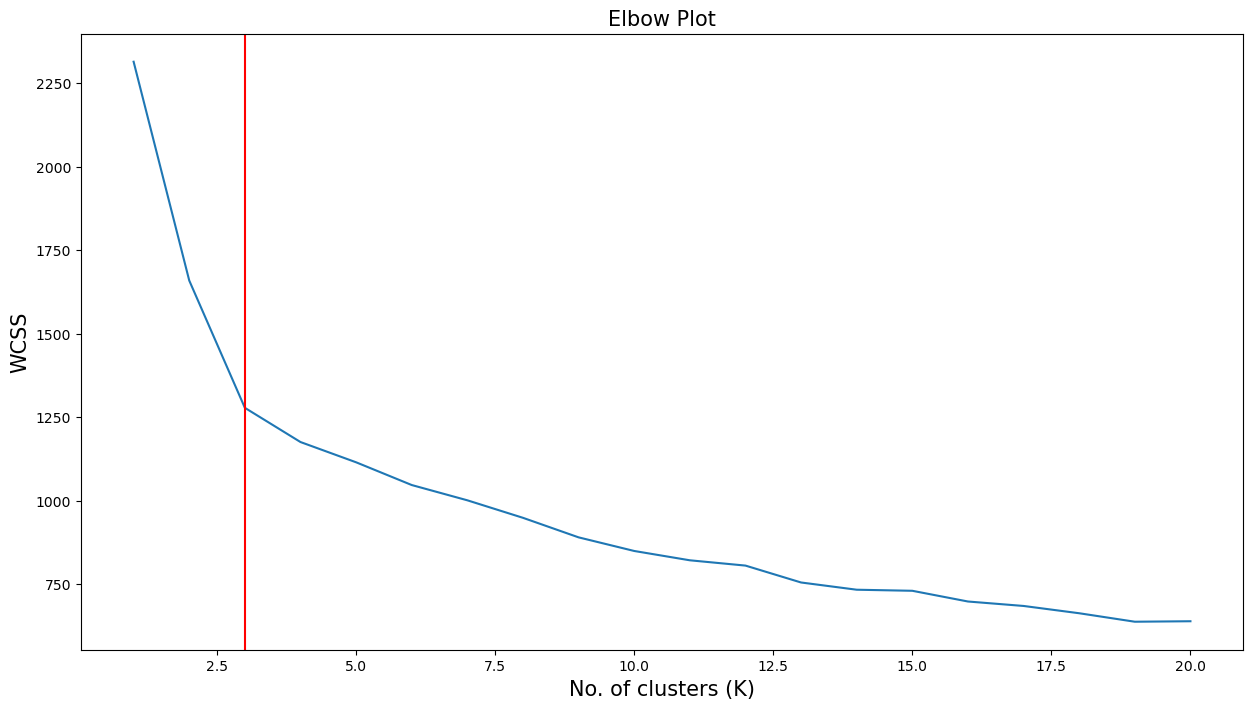

In [27]:
plt.plot(range(1,21), wcss)
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.axvline(x = 3, color = 'red')

# display the plot
plt.show()

**Interpretation:** We can see that the for K = 3, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 3, the WCSS is decreasing slowly.

Now, let us use the silhouette score method to identify the optimal value of K.

### Optimal Value of K Using Silhouette Score

In [28]:
n_clusters = [2, 3, 4, 5, 6]

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.26831340971052126)
For 3 clusters the silhouette score is 0.2848589191898987)
For 4 clusters the silhouette score is 0.25558188192125253)
For 5 clusters the silhouette score is 0.1788917945332562)
For 6 clusters the silhouette score is 0.18613916883583806)


#### Visualize the silhouette scores

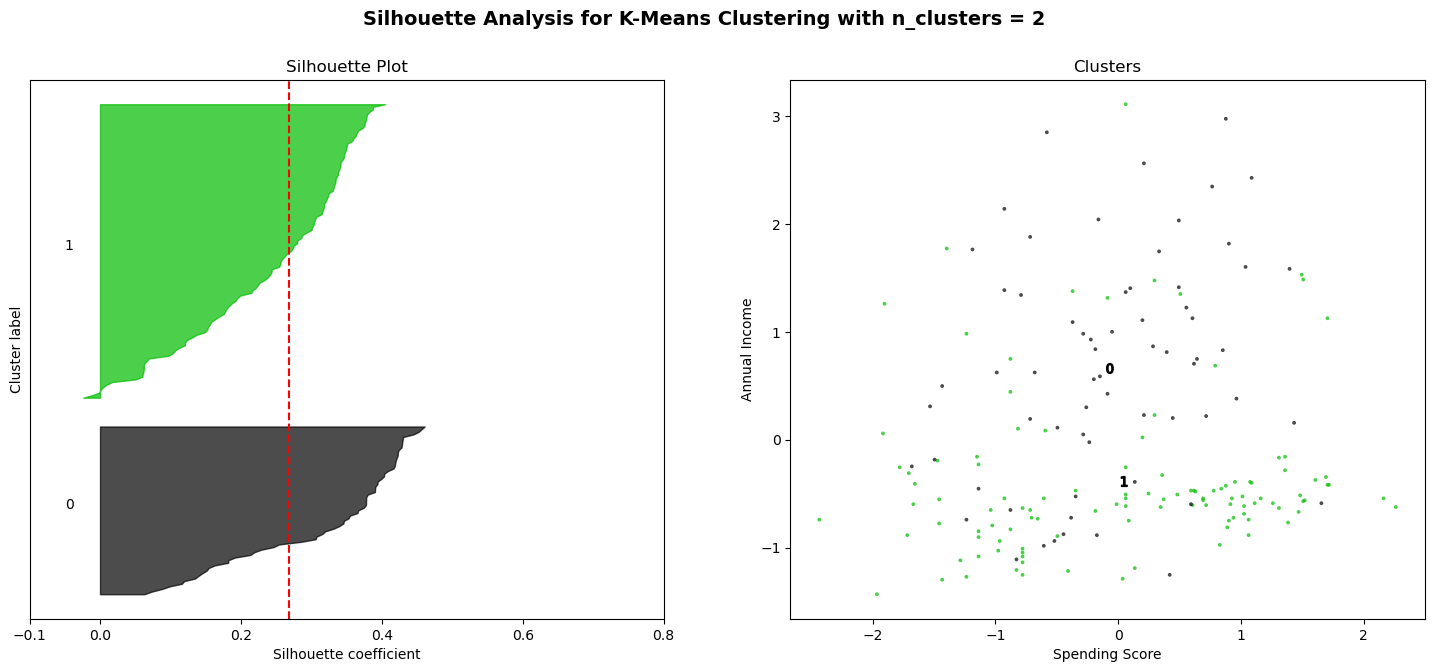

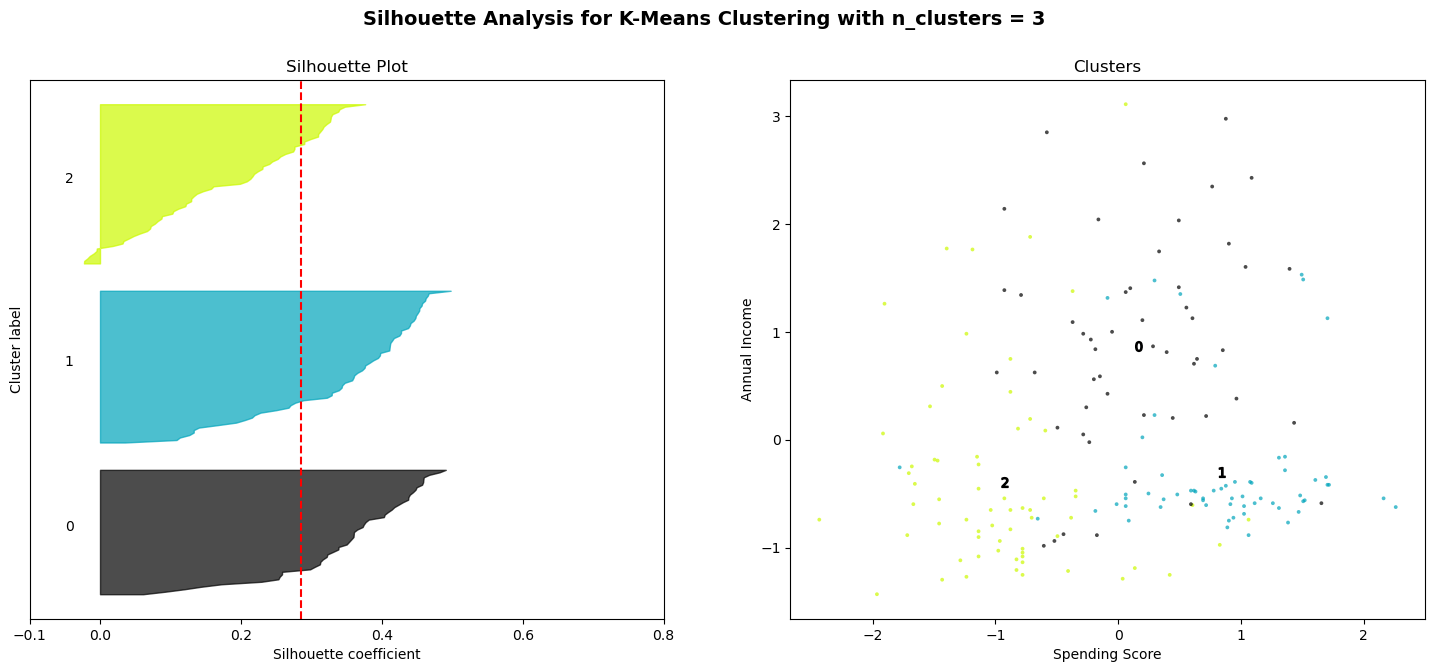

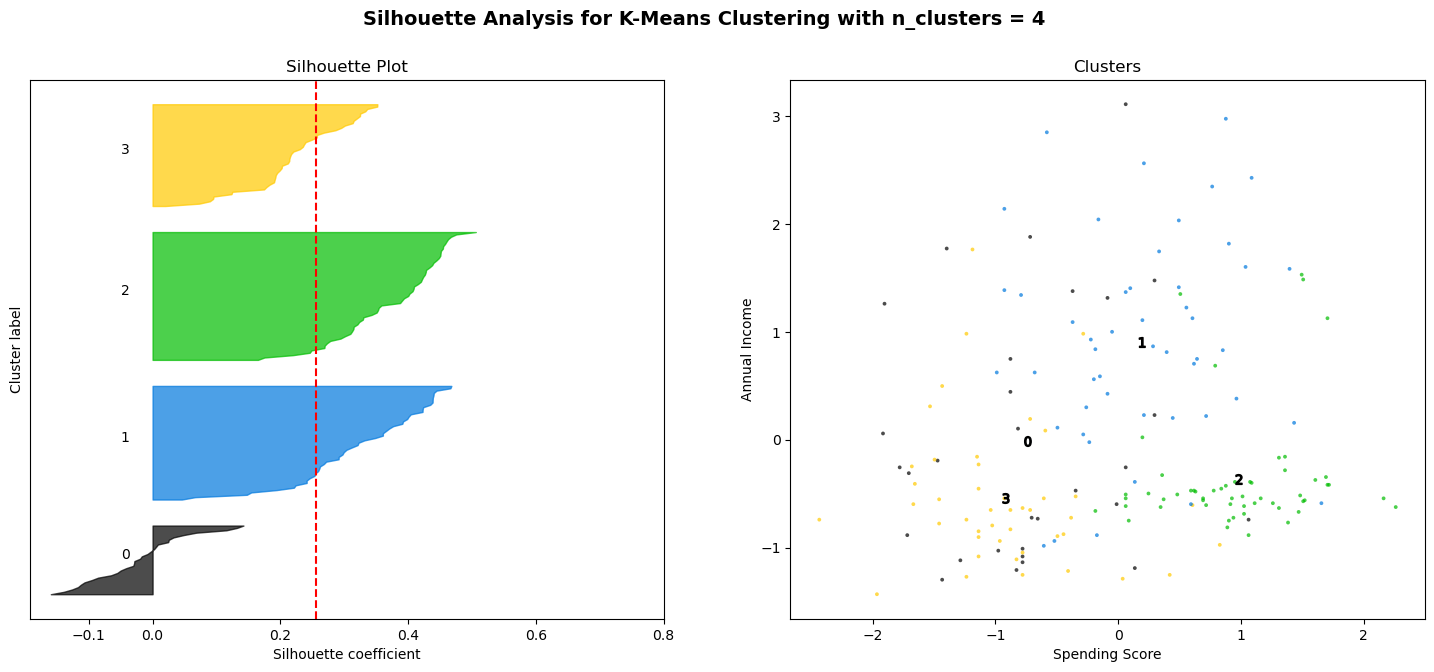

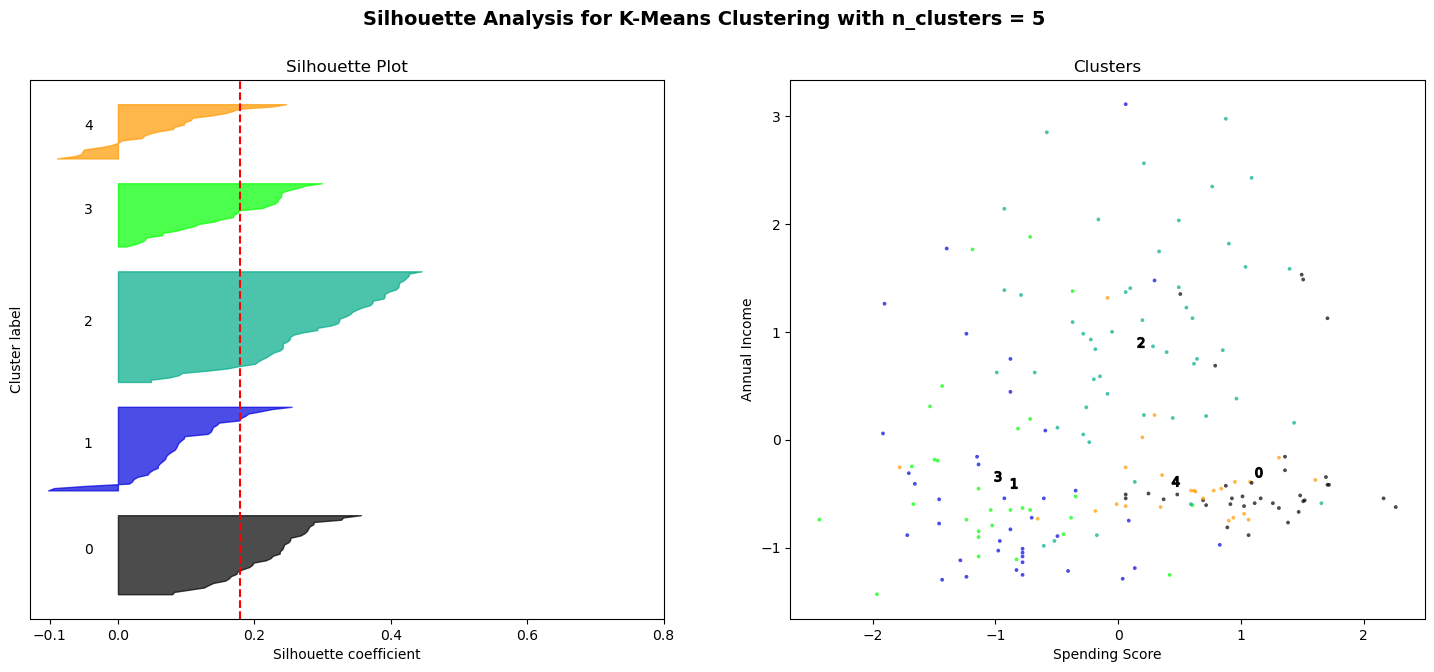

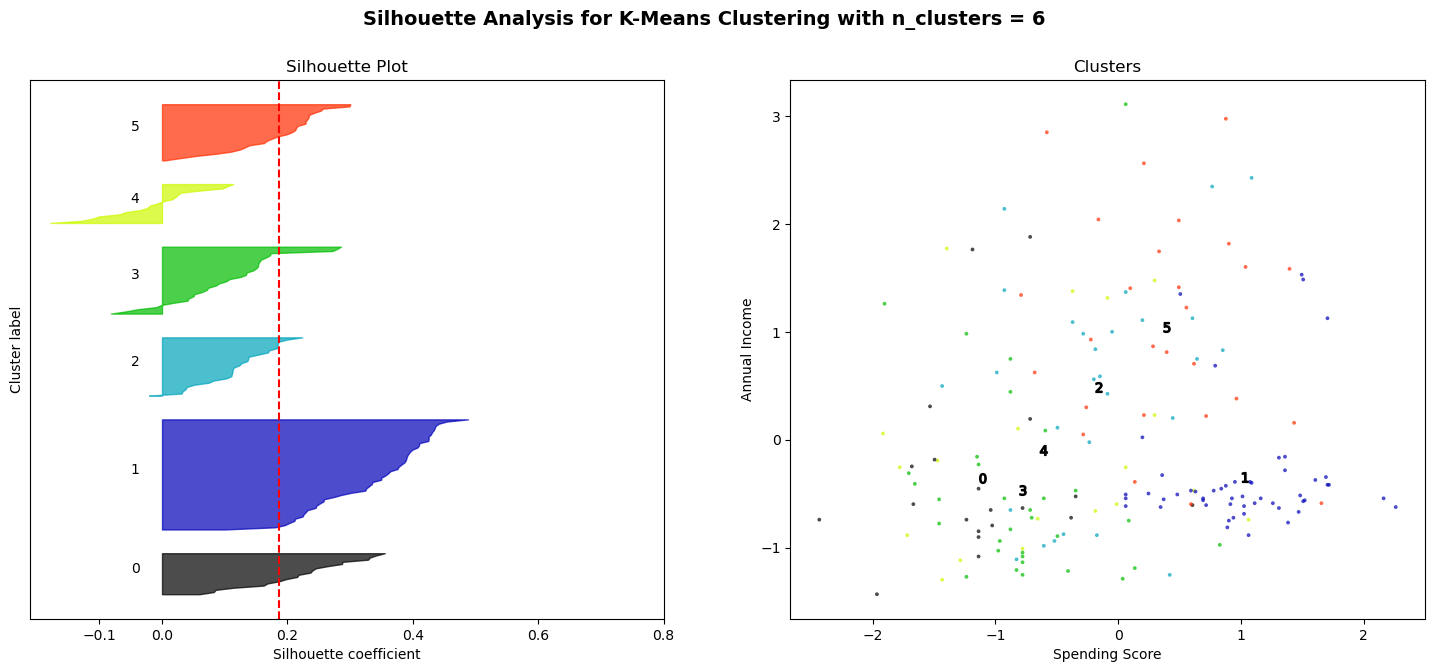

In [29]:
n_clusters = [2, 3, 4, 5, 6]
X = np.array(X)

for K in n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    model = KMeans(n_clusters = K, random_state = 10)
    cluster_labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])
    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    centers = model.cluster_centers_
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

plt.show()

**Interpretation:** The above plot shows the silhouette plot and the clusters formed for each value of K. From the above output, we can see that the silhouette score is maximum for k = 3 and from the plot, we can see that there are no outliers for 3 clusters and all the clusters have silhouette coefficients greater than the average silhouette score. Thus we choose K = 3 as the optimal value of k.

### Build the Clusters

In [30]:
new_clusters = KMeans(n_clusters = 3, random_state = 10)
new_clusters.fit(X)

df['Cluster'] = new_clusters.labels_

In [31]:
df.head()

,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


#### Check the size of each cluster

In [32]:
df.Cluster.value_counts()

2    65
1    62
0    51
Name: Cluster, dtype: int64

**Plot a barplot to visualize the cluster sizes**

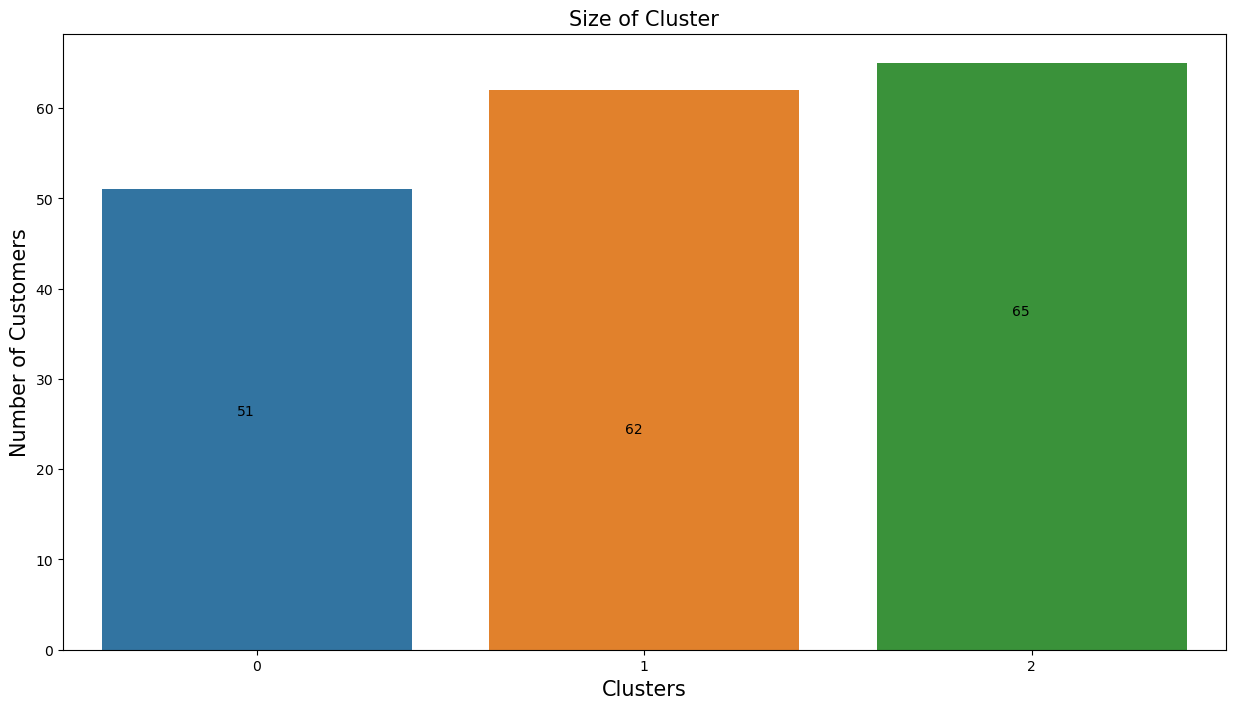

In [33]:
sns.countplot(data= df, x = 'Cluster')

plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

plt.text(x = -0.05, y =26, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =37, s = np.unique(new_clusters.labels_, return_counts=True)[1][2])

plt.show()

In [34]:
df.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid_phenols', 'Proanth', 'Color_int', 'Hue', 'OD', 'Proline',
       'Cluster'],
      dtype='object')

### Analyze the Clusters

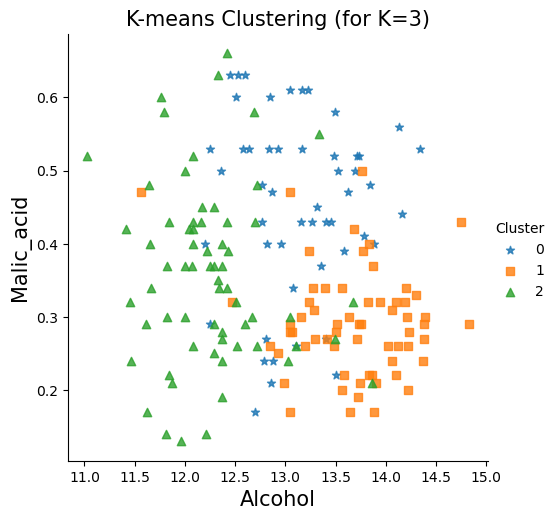

In [35]:
sns.lmplot(x = 'Alcohol', y = 'Nonflavanoid_phenols', data = df, hue = 'Cluster', 
                markers = ['*', ',', '^'], fit_reg = False)

plt.title('K-means Clustering (for K=3)', fontsize = 15)
plt.xlabel('Alcohol', fontsize = 15)
plt.ylabel('Malic_acid', fontsize = 15)

plt.show()

## Agglomerative Clustering

To perform hierarchical clustering, we need to specify the number of required clusters to the `AgglomerativeClustering()` from the scikit-learn library.

To find the optimal number of clusters, we consider two methods: `Dendrogram` and `Silhouette Score Method`.

First, we find the linkage matrix. It represents the distance between the clusters based on the given linkage method. There are several linkage methods like `single`, `complete`, `average`, `centroid` `ward`. Here we use the `ward linkage` to calculate the linkage matrix. For most of the datasets, this method returns most explicit clusters.

In [36]:
# instantiate linkage object with scaled data and consider 'ward' linkage method 
link_mat = linkage(X, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[  9.          47.           1.16411367   2.        ]
 [131.         133.           1.19160238   2.        ]
 [ 11.          12.           1.20935571   2.        ]
 [ 15.          53.           1.22551046   2.        ]
 [ 92.         107.           1.24538798   2.        ]
 [ 34.          37.           1.26841838   2.        ]
 [  0.          20.           1.28789316   2.        ]
 [ 16.          17.           1.2917937    2.        ]
 [164.         172.           1.30048379   2.        ]
 [ 22.          29.           1.33566687   2.        ]]


### Plot the Dendrogram

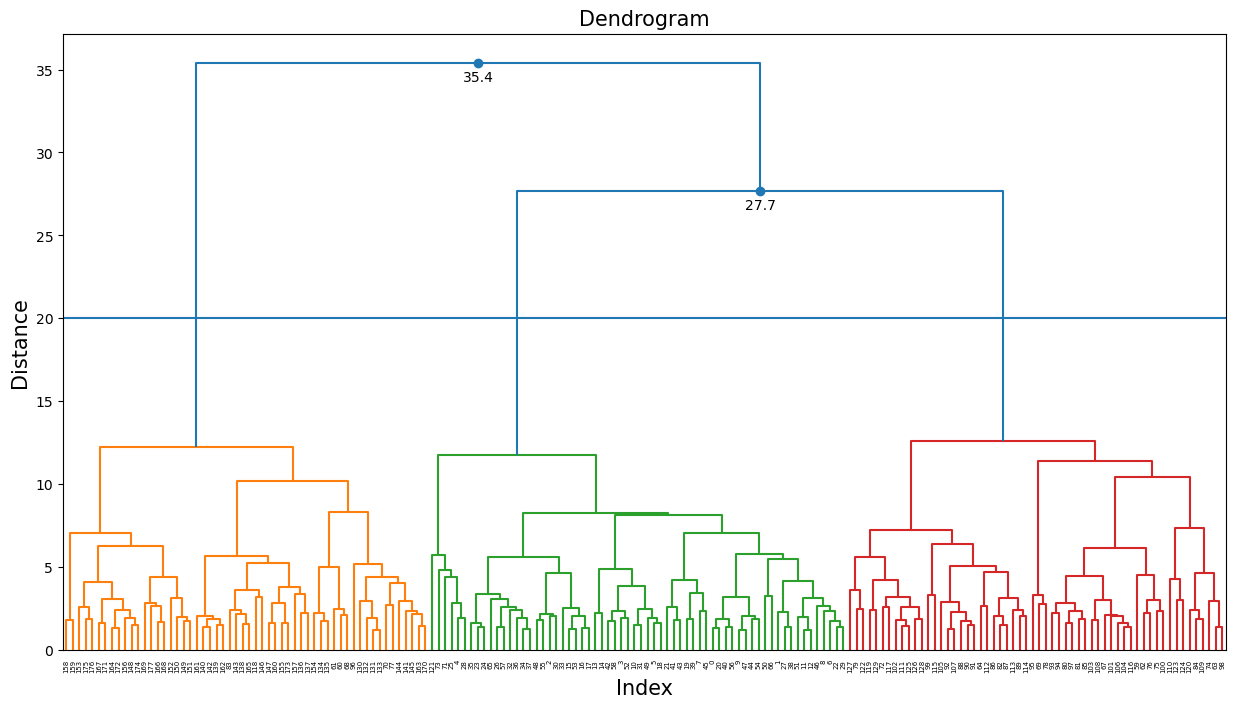

In [37]:
dendro = dendrogram(link_mat)

for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    
    x = sum(i[1:3])/2
    y = d[1]
    if y > 20:
        
        plt.plot(x, y, 'o', c=c)
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')

plt.axhline(y = 20)
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)

plt.show()

**Interpretation:** 

1) x-axis contains the observations and the y-axis contains the distances computed using the 'ward' method. 

2) Horizontal lines show the merging of the clusters.

3) The topmost line in the dendrogram refers to a single cluster of all the data points.

The above dendrogram shows that the number of clusters (=3) is constant. Thus, we can consider the value 'three' as the optimal number of clusters.

#### Let us calculate the Cophenetic correlation coefficient to study the quality of clusters formed using dendrogram.

In [38]:
eucli_dist = euclidean_distances(X)
dist_array = eucli_dist[np.triu_indices(178, k = 1)]
coeff, cophenet_dist = cophenet(link_mat, dist_array)

print(coeff)

0.6623487206613261


**Interpretation:** The value of cophenetic correlation coefficient is 0.6623. The value close to 1 indicates the best linkage quality. Here we can say that the linkage quality is good.

### Silhouette Score Method

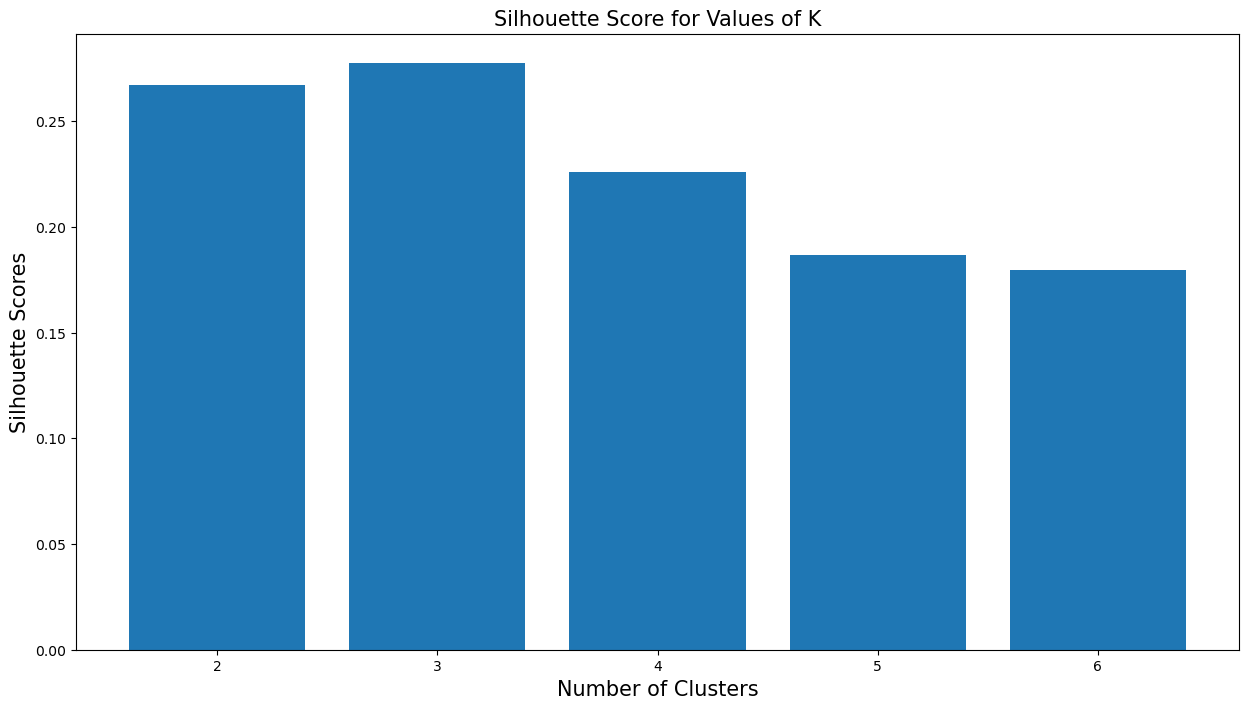

In [39]:
K = [2,3,4,5,6]
silhouette_scores = [] 

for i in K:
    
    model = AgglomerativeClustering(n_clusters = i) 
    silhouette_scores.append(silhouette_score(X, model.fit_predict(X))) 
    
plt.bar(K, silhouette_scores) 

plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

plt.show()

**Interpretation:** The above plot shows that the Silhouette score for K = 3 is the highest. This implies that K = 3 is the optimal value for number of clusters.

Both the dendrogram and Silhouette score method returns K = 3 as the optimal value for the number of clusters. Now we retrieve the clusters and visualize the data.

### Retrieve the Clusters

#### Let us use `AgglomerativeClustering()` to form two clusters. 

In [40]:
clusters = AgglomerativeClustering(n_clusters=3, linkage='ward')

clusters.fit(X)

AgglomerativeClustering(n_clusters=3)

In [41]:
df['Cluster_AggC'] = clusters.labels_

# print head() of the newly formed dataframe
df.head()

,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline,Cluster,Cluster_AggC
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2


In [42]:
df.head(2)

,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline,Cluster,Cluster_AggC
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2


In [43]:
# check the size of each cluster
df['Cluster_AggC'].value_counts()

2    64
0    58
1    56
Name: Cluster_AggC, dtype: int64

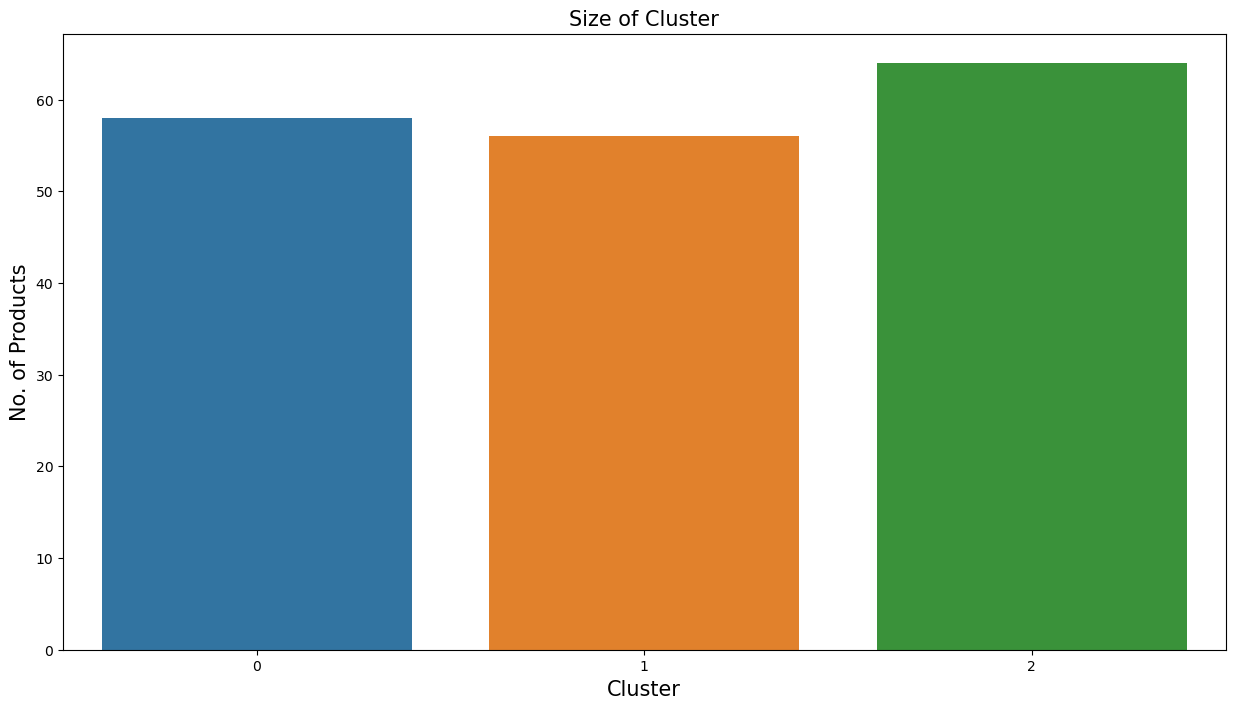

In [44]:
# plot the countplot for the cluster size
sns.countplot(data = df, x = 'Cluster_AggC')

plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Products', fontsize = 15)

plt.show()

### Analyze the Clusters

In [45]:
df.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid_phenols', 'Proanth', 'Color_int', 'Hue', 'OD', 'Proline',
       'Cluster', 'Cluster_AggC'],
      dtype='object')

Now let us visualize the clusters. As we have more than 2 features, we consider only the variables `Alcohol` and `Malic_acid` to visualize the clusters.

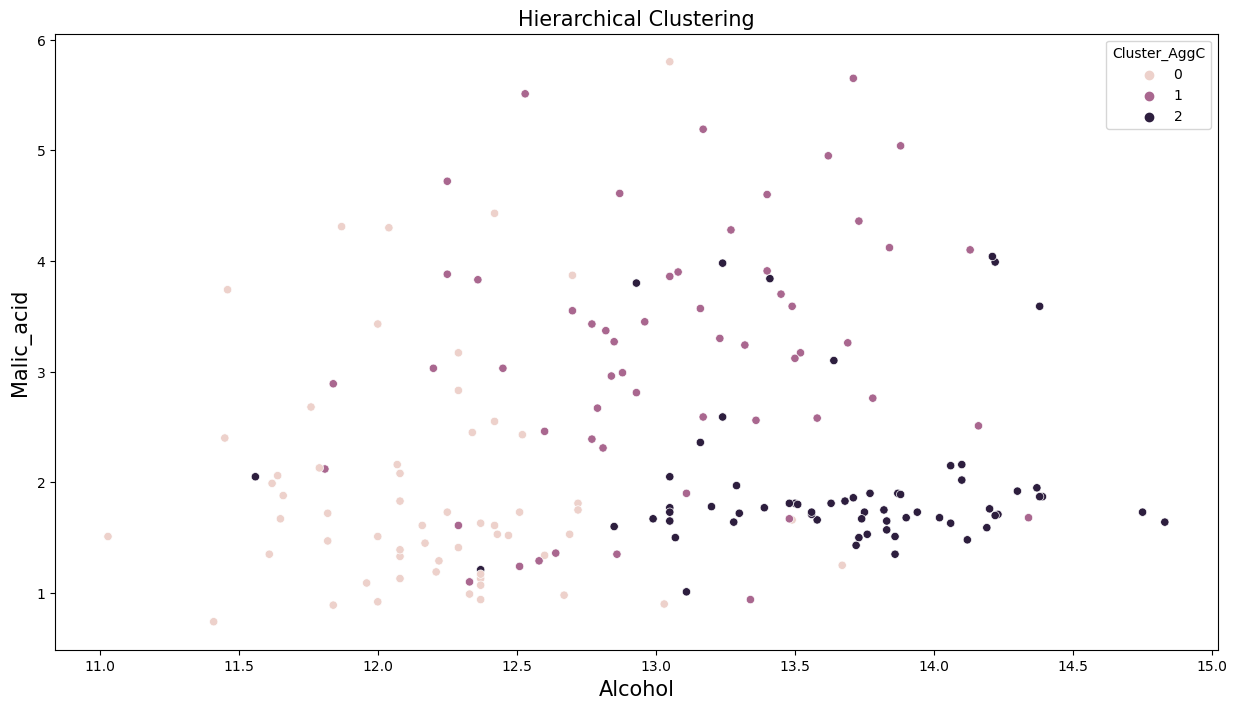

In [46]:
sns.scatterplot(x = 'Alcohol', y = 'Malic_acid', data = df, hue = 'Cluster_AggC')

plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('Alcohol', fontsize = 15)
plt.ylabel('Malic_acid', fontsize = 15)

plt.show()

### DBSCAN

In [47]:
dist_array = euclidean_distances(X)[np.triu_indices(178, k = 1)]

# calculate the minimum euclidean distance between the data points 
print('Minimum Distance:', dist_array.min())

# calculate the maximum euclidean distance between the data points 
print('Maximum Distance:', dist_array.max())

Minimum Distance: 1.1641136694837702
Maximum Distance: 11.211496062171108


In [48]:
model = DBSCAN(eps = 0.025)

# fit the model on the scaled data
model.fit(X)

DBSCAN(eps=0.025)

In [49]:
# display the unique clusters formed by DBSCAN
(set(model.labels_))

{-1}

In [50]:
model = DBSCAN(eps = 0.5)

# fit the model on the scaled data
model.fit(X)

# display the unique clusters formed by DBSCAN
(set(model.labels_))

{-1}

In [51]:
model = DBSCAN(eps = 0.0000005)
model.fit(X)

# display the unique clusters formed by DBSCAN
(set(model.labels_))

{-1}

Even though we are using the lowest eps value, we are getting the clusters as -1, so this is not the optimal solution for clustering these values.

In [52]:
# add a column containing cluster number to the original data
df['Cluster_DBSCAN'] = model.labels_

# print head() of the newly formed dataframe
df.head()

,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline,Cluster,Cluster_AggC,Cluster_DBSCAN
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,2,-1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2,-1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2,-1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,2,-1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,2,-1


In [53]:
# check the size of each cluster
df['Cluster_DBSCAN'].value_counts()

-1    178
Name: Cluster_DBSCAN, dtype: int64

In [54]:
df.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid_phenols', 'Proanth', 'Color_int', 'Hue', 'OD', 'Proline',
       'Cluster', 'Cluster_AggC', 'Cluster_DBSCAN'],
      dtype='object')

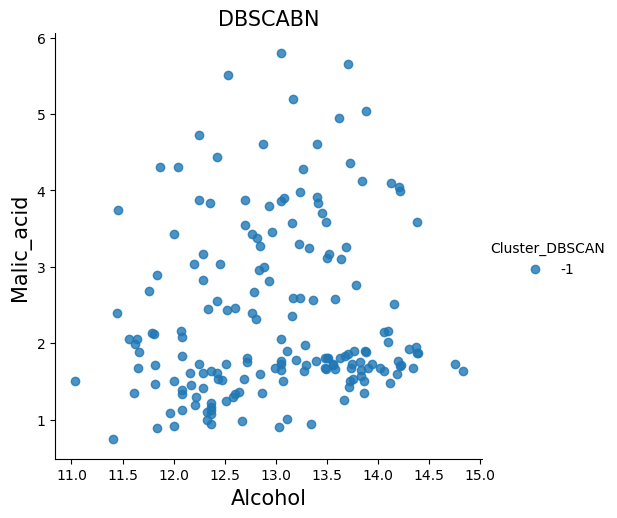

In [55]:
sns.lmplot(x = 'Alcohol', y = 'Malic_acid', data = df, hue = 'Cluster_DBSCAN', markers = ['o'], 
           fit_reg = False)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('DBSCABN', fontsize = 15)
plt.xlabel('Alcohol', fontsize = 15)
plt.ylabel('Malic_acid', fontsize = 15)

# display the plot
plt.show()

Here we can see that the DBSCAN algorithm has not grouped the product like hierarchical clustering. Thus we can conclude that the DBSCAN algorithm is working poorly on this dataset.

### Principal Component Analysis (PCA)

### Covariance Matrix

In [56]:
cov_mat = np.cov(X.T)
print(cov_mat[0:5])

[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]]


### Compute Eigenvalues and Eigenvectors 

In [57]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001] 

Eigenvectors: 
 
 [[-0.1443294   0.48365155  0.20738262 -0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093 -0.08901289  0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881 -0.6262239  -0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905  -0.61208035  0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634   -0.13075693 -0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 

In [58]:
X.shape

(178, 13)

**Interpretation:** For the 13x13 covariance matrix, we get 13 eigenvalues and eigenvectors. The eigenvector corresponding to the largest eigenvalue represent the direction of the highest variation in the dataset.

### Decide Number of Principal Components

In [59]:
eig_val = list(eig_val)
eig_val.sort(reverse = True)

print(eig_val)

[4.732436977583596, 2.511080929645129, 1.4542418678464684, 0.9241658668248747, 0.8580486765371116, 0.6452822124678548, 0.5541414662457838, 0.350466274946254, 0.29051203269397746, 0.2523200103608248, 0.2270642817308851, 0.16972373898012155, 0.10396199182075329]


To decide the number of components, we can use different methods as: `Scree plot`, `Percentage of Explained Variation`.

#### 1) Scree plot: Plot the eigenvalues and choose the number of components corresponding to the elbow point.

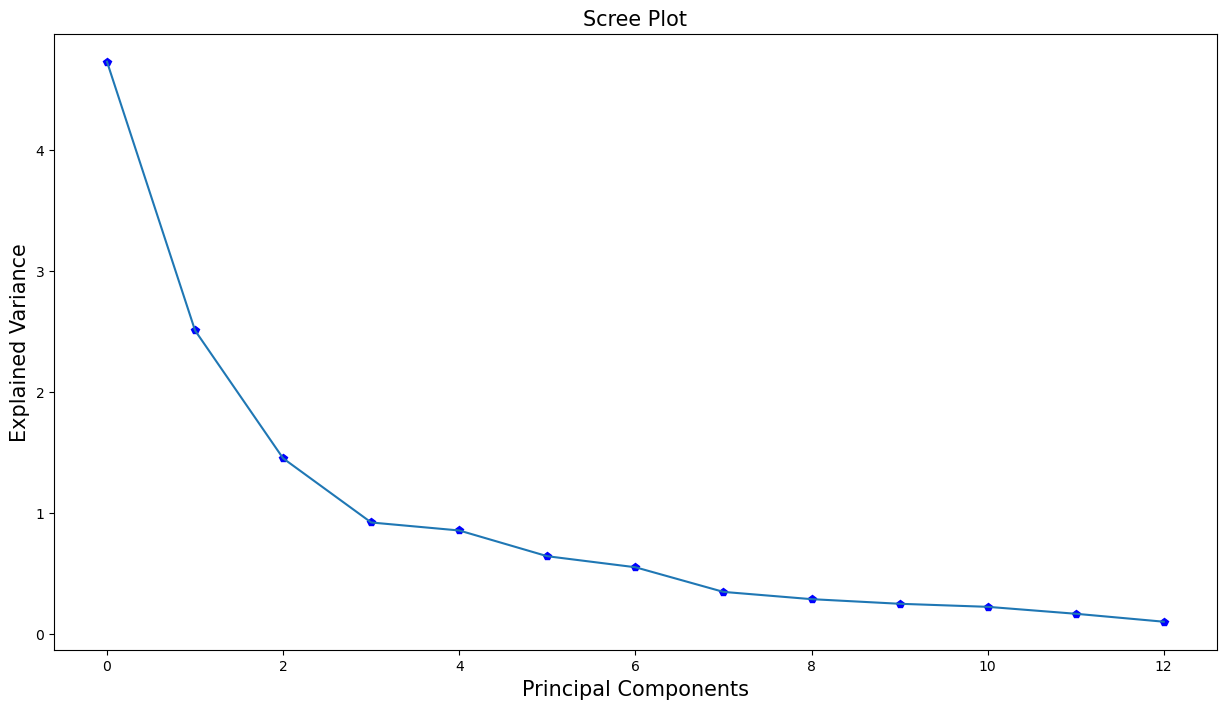

In [60]:
plt.plot(eig_val,'bp')            

plt.plot(eig_val) 
plt.title('Scree Plot', fontsize = 15)
plt.xlabel('Principal Components', fontsize = 15)    
plt.ylabel('Explained Variance', fontsize = 15)      

plt.show()   

#### 2) Percentage of Explained Variation: Calculate the percentage of variation explained by each principal component. We consider the number of components that explain most of the variation.

In [61]:
percent_var = []

for i in eig_val:
    variation = (i/sum(eig_val))*100
    percent_var.append(variation)

percent_var

[36.19884809992634,
 19.207490257008956,
 11.123630536249982,
 7.0690301827140285,
 6.563293679648598,
 4.935823319222566,
 4.2386793226233195,
 2.6807489483788625,
 2.2221534047897125,
 1.9300190939440767,
 1.7368356899899142,
 1.2982325756042126,
 0.7952148898994515]

In [62]:
np.cumsum(percent_var)

array([ 36.1988481 ,  55.40633836,  66.52996889,  73.59899908,
        80.16229276,  85.09811607,  89.3367954 ,  92.01754435,
        94.23969775,  96.16971684,  97.90655253,  99.20478511,
       100.        ])

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13']


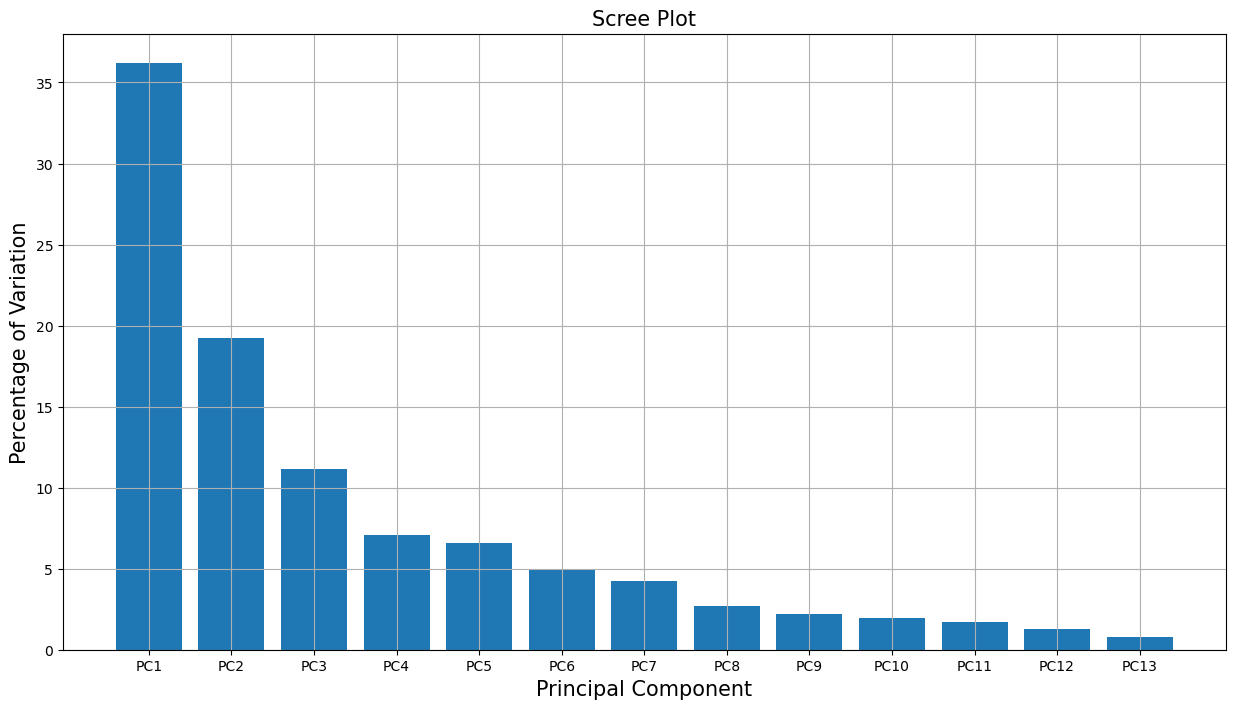

In [63]:
princ_comp = ['PC' + str(x) for x in range(1, 14)]

print(princ_comp)

plt.bar(x = range(1, 14), height = percent_var, tick_label = princ_comp)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.grid();

In [64]:
pca = PCA(n_components = 2, random_state = 10)

components = pca.fit_transform(X)

In [65]:
df_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])

df_pca.head()

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [66]:
# We add to the previous data frame the labels 

projected_data = pd.concat([df_pca, original_df[['Wine']]], axis = 1)
convert_dict = { 'PC1' : float,
                 'PC2' : float,
    'Wine': int }  
  
projected_data = projected_data.astype(convert_dict)  
projected_data

,PC1,PC2,Wine
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1
...,...,...,...
173,-3.370524,-2.216289,3
174,-2.601956,-1.757229,3
175,-2.677839,-2.760899,3
176,-2.387017,-2.297347,3


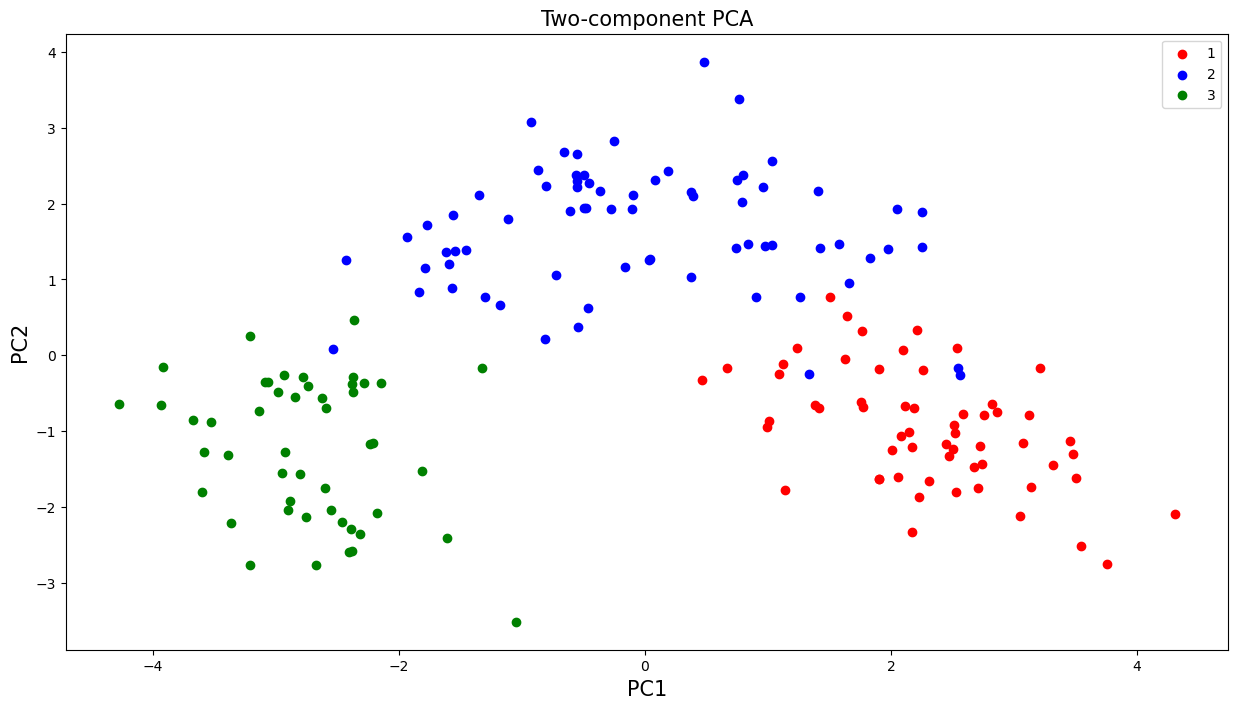

In [67]:
labels = projected_data['Wine'].unique()
colors = ["r", "b", "g"]

for label, color in zip(labels, colors):
    index = projected_data["Wine"]==label
    plt.scatter(projected_data.loc[index, "PC1"],
                projected_data.loc[index, "PC2"],
                c = color)
    
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.title("Two-component PCA", fontsize = 15)
plt.legend(labels);

In [68]:
original_df.head(2)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [69]:
df['Cluster_AggC'] = df['Cluster_AggC'].replace([2, 1, 0], [3,2,1])

In [70]:
df['Cluster_AggC'].value_counts()

3    64
1    58
2    56
Name: Cluster_AggC, dtype: int64

In [71]:
original_df['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

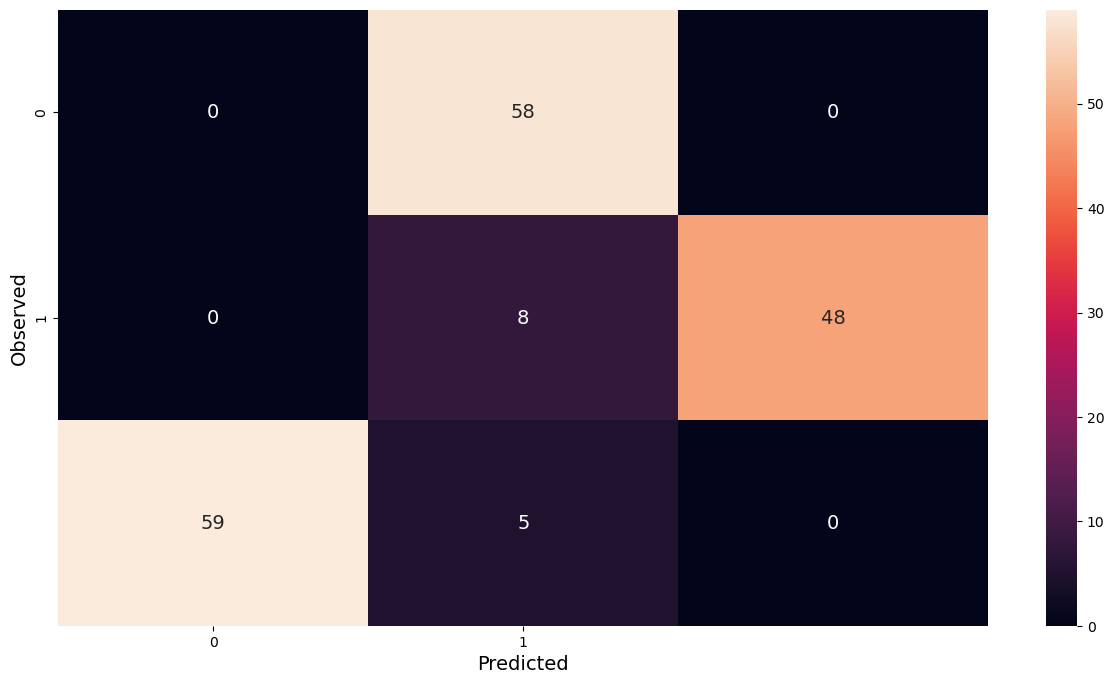

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(df['Cluster_AggC'],original_df['Wine'])
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":14},
           xticklabels=['0', '1'],
           yticklabels=['0', '1'],
           fmt=".0f")
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Observed', fontsize=14);

In [73]:
# consider the target variable
df_target = original_df['Wine']

df_target.unique()

array([1, 2, 3])

In [74]:
X = original_df.drop('Wine', axis = 1)
X.head(2)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_target, test_size = 0.2, random_state = 10)

In [76]:
def decisiontree_model_run(X_train, X_test, y_train, y_test):
    
    df_tree = DecisionTreeClassifier(random_state=10)
    df_tree.fit(X_train, y_train)
    y_pred = df_tree.predict(X_test)
    
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [77]:
%%time
# '%%time' returns the time required for the execution of the model

decisiontree_model_run(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9444444444444444
CPU times: user 7.83 ms, sys: 1.17 ms, total: 9 ms
Wall time: 2.69 ms
